# k-Means: A Centroid-Based Technique #

Suppose a data set, $D$, contains $n$ objects in Euclidean space. Partitioning methods distribute the objects in $D$ into $k$ clusters, $C_1,... , C_k$ , that is, $C_i\subset D$ and $C_i\cap C_j=\varnothing$ for $(1\leq i,j\leq k)$ An objective function is used to assess the partitioning quality so that objects within a cluster are similar to one another but dissimilar to objects in other clusters. This is, the objective function aims for high intracluster similarity and low intercluster similarity.<br/>
A centroid-based partitioning technique uses the centroid of a cluster, $C_i$, to represent that cluster. Conceptually, the centroid of a cluster is its center point. The centroid can be deﬁned in various ways such as by the mean or medoid of the objects (or points) assigned to the cluster. The difference between an object $p \in C_i$ and $c_i$, the representative of the cluster, is measured by $dist(p, c_i)$, where $dist(x, y)$ is the Euclidean distance between two points $x$ and $y$. The quality of cluster $C_i$ can be measured by the withincluster variation, which is the sum of squared error between all objects in $C_i$ and the centroid ci, deﬁned as
$$E=\sum\limits_{i=1}^k\sum\limits_{p\in C_i} dist(p,c_i)^2$$
where $E$ is the sum of the squared error for all objects in the data set; $p$ is the point in space representing a given object; and $c_i$ is the centroid of cluster $C_i$ (both $p$ and $c_i$ are multidimensional). In other words, for each object in each cluster, the distance from the object to its cluster center is squared, and the distances are summed. This objective function tries to make the resulting $k$ clusters as compact and as separate as possible.<br/>
*“How does the k-means algorithm work?”* The k-means algorithm deﬁnes the centroid of a cluster as the mean value of the points within the cluster. It proceeds as follows. First, it randomly selects $k$ of the objects in $D$, each of which initially represents a cluster mean or center. For each of the remaining objects, an object is assigned to the cluster to which it is the most similar, based on the Euclidean distance between the object and the cluster mean. The $k$-means algorithm then iteratively improves the within-cluster variation. For each cluster, it computes the new mean using the objects assigned to the cluster in the previous iteration. All the objects are then reassigned using the updated means as the new cluster centers. The iterations continue until the assignment is stable, that is, the clusters formed in the current round are the same as those formed in the previous round.


<div>
<img src="misc/K-Means process-1.gif" width="450">
<img src="misc/K-Means process-2.gif" width="450">
<img src="misc/K-Means process-3.gif" width="450">
<img src="misc/K-Means process-4.gif" width="450">
<img src="misc/K-Means process-5.gif" width="450">
<img src="misc/K-Means process.png" width="450">
<img src="misc/K-Means process-multi-iterations.gif" width="450">
</div>

<b>Algorithm: $K$-Means.</b> The $k$-means algorithm for partitioning, where each cluster’s center
is represented by the mean value of the objects in the cluster.
<b>Input:</b>
- $k$: the number of clusters.
- $D$: a data set containing $n$ objects.

<b>Output:</b> A set of $k$ clusters.
<br>
<b>Method:</b>
1. arbitrarily choose $k$ objects from $D$ as the initial cluster centers;
2. <b>repeat</b>
    1. (re)assign each object to the cluster to which the object is the most similar, based on the mean value of the objects in the cluster;
    2. update the cluster means, that is, calculate the mean value of the objects for each cluster;
3. <b>until</b> no change;

Mathematical representation is as follows:<br/>
Repeat the following until convergence:($\mu_1,\mu_2,...\mu_n$ are cluster centroids in each iteration)<br/>
For every $i$, set
$$c^i:=arg\underset{j}min||x^i-\mu_j||^2$$
For every $j$, set
$$\mu_j:=\frac{{\sum_{i=1}^{n}1\{c^{i}=j\}x^i}}{{\sum_{i=1}^{n}1\{c^{i}=j\}}}$$
Time complexity: $O(I\times K\times n\times d)$<br/>
$n$= No. of points<br/>
$K$= No. of clusters<br/>
$I$= No. of iterations<br/>
$d$= No. of dimensionality<br/>
tips & tricks:
1. It is always a good practice to select the initial points far from each other.(why?)
2. K-means algorithm limitations:
<div>
size<br/>
<img src="misc/sizes.png" width="450"><br/>
density<br/>
<img src="misc/density.png" width="450"><br/>
non-globular shape<br/>
<img src="misc/non-globular.png" width="450"><br/>
</div>

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


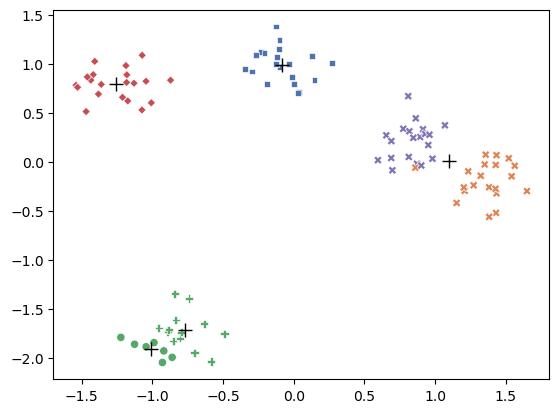

[2]


In [1]:
# source: https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import seaborn as sns
import random
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters, self.max_iter = n_clusters,max_iter
    def fit(self, X_train):
        #KMeans++ initialization: Random initial points are selected from X_train instead of being chosen completely random
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # counter for max_iter 
        iteration = 0
        # first iteration does not contain any previously selected centroids
        prev_centroids = None
        # loop until convergence occurs or max iteration is achieved
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # create empty lists for each cluster
            sorted_points = [[] for _ in range(self.n_clusters)]
            # assign each data point(x) to the nearest centroid
            for x in X_train:
                # calculate the distance of each centroid to x 
                dists = euclidean(x, self.centroids)
                # identify nearest centroid to x
                centroid_idx = np.argmin(dists)
                # append x to its nearest centroid
                sorted_points[centroid_idx].append(x)
            # push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            # recalculate centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            # Catch any np.nans, resulting from a centroid having no points
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        # choose nearest centroid to each x in X
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()